## 🎓 Próximos Passos

Parabéns! Você aprendeu:
- ✅ Estados e operadores quânticos
- ✅ Dinâmica (Schrödinger)
- ✅ Sistemas abertos (Lindblad)
- ✅ Visualização
- ✅ Parametrização de experimentos

### Explore mais:
1. **Entanglement** - Estados emaranhados (Bell states)
2. **Dissipação Dephasing** - Operadores de ruído
3. **Sistemas multi-qubit** - Portas lógicas quânticas
4. **Oscilador Harmônico** - Fótons em cavidades
5. **Controle ótimo** - Otimizar pulsos de microondas

In [35]:
# 8.1 Salvar dados de experimento em CSV

# Criar dataframe com resultados
results_data = []
for omega in [0.5, 1.0, 2.0]:
    for gamma in [0, 0.05, 0.1]:
        times, p0, p1 = simular_rabi(omega, ket_plus, gamma=gamma)
        
        # Calcular período da oscilação (distância entre cruzamentos sucessivos)
        crossings = np.where(np.diff(np.sign(p0 - 0.5)))[0]
        if len(crossings) >= 2:
            # Período = distância entre 2 cruzamentos sucessivos × 2 (meio-período)
            T_period = 2 * (times[crossings[1]] - times[crossings[0]])
        else:
            T_period = np.nan
        
        results_data.append({
            'omega': omega,
            'gamma': gamma,
            'contrast': max(p0) - min(p0),
            'avg_P0': np.mean(p0),
            'T_period': T_period
        })

df_results = pd.DataFrame(results_data)
print(df_results)

# Salvar
csv_path = output_dir / 'experimentos_rabi.csv'
df_results.to_csv(csv_path, index=False)
print(f"\n✓ Resultados salvos em '{csv_path}'")

   omega  gamma      contrast    avg_P0  T_period
0    0.5   0.00  4.440892e-16  0.500000  0.507732
1    0.5   0.05  3.576952e-01  0.714986       NaN
2    0.5   0.10  4.594987e-01  0.816287       NaN
3    1.0   0.00  4.440892e-16  0.500000  0.253866
4    1.0   0.05  2.332560e-01  0.628639       NaN
5    1.0   0.10  3.576952e-01  0.714986       NaN
6    2.0   0.00  4.440892e-16  0.500000  0.126933
7    2.0   0.05  1.347987e-01  0.570887       NaN
8    2.0   0.10  2.332560e-01  0.628639       NaN

✓ Resultados salvos em 'C:\Users\karin\OneDrive\qutip_outputs\experimentos_rabi.csv'


C:\Users\karin\AppData\Roaming\Python\Python314\site-packages\qutip\solver\solver_base.py:598: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


C:\Users\karin\AppData\Local\Temp\ipykernel_2080\1876006833.py:24: UserWarning: Glyph 10216 (\N{MATHEMATICAL LEFT ANGLE BRACKET}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\karin\AppData\Local\Temp\ipykernel_2080\1876006833.py:24: UserWarning: Glyph 10217 (\N{MATHEMATICAL RIGHT ANGLE BRACKET}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\karin\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10216 (\N{MATHEMATICAL LEFT ANGLE BRACKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\karin\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10217 (\N{MATHEMATICAL RIGHT ANGLE BRACKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


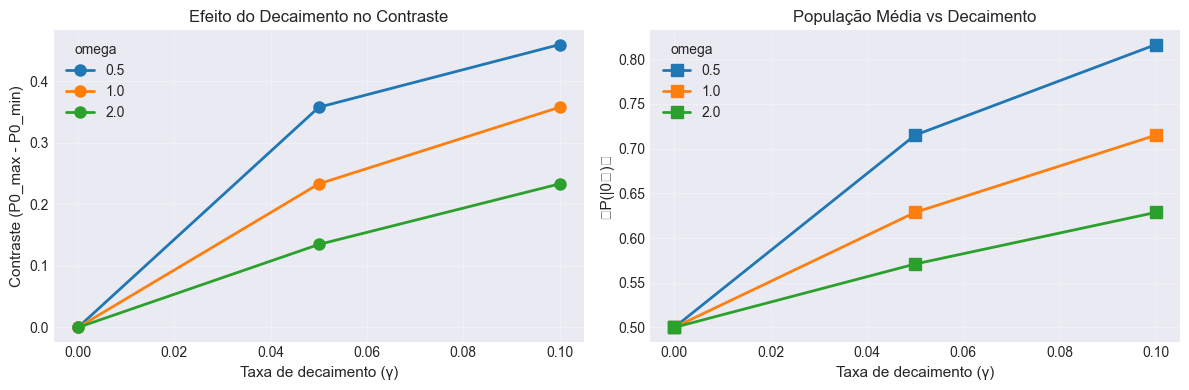

✓ Análise de resultados carregados


In [36]:
# 8.2 Recarregar e visualizar
df_loaded = pd.read_csv(output_dir / 'experimentos_rabi.csv')

# Pivotear para visualizar como função de omega e gamma
pivot_contrast = df_loaded.pivot(index='omega', columns='gamma', values='contrast')
pivot_avgP0 = df_loaded.pivot(index='omega', columns='gamma', values='avg_P0')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Gráfico 1: Contraste
pivot_contrast.T.plot(ax=axes[0], marker='o', linewidth=2, markersize=8)
axes[0].set_xlabel('Taxa de decaimento (γ)', fontsize=11)
axes[0].set_ylabel('Contraste (P0_max - P0_min)', fontsize=11)
axes[0].set_title('Efeito do Decaimento no Contraste', fontsize=12)
axes[0].grid(alpha=0.3)

# Gráfico 2: Média P0
pivot_avgP0.T.plot(ax=axes[1], marker='s', linewidth=2, markersize=8)
axes[1].set_xlabel('Taxa de decaimento (γ)', fontsize=11)
axes[1].set_ylabel('⟨P(|0⟩)⟩', fontsize=11)
axes[1].set_title('População Média vs Decaimento', fontsize=12)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Análise de resultados carregados")

## Seção 8: Salvando e Carregando Resultados

Persistir dados de experimentos para análise posterior.

C:\Users\karin\AppData\Roaming\Python\Python314\site-packages\qutip\solver\solver_base.py:598: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
C:\Users\karin\AppData\Local\Temp\ipykernel_2080\426899416.py:19: UserWarning: Glyph 10217 (\N{MATHEMATICAL RIGHT ANGLE BRACKET}) missing from font(s) Arial.
  plt.tight_layout()


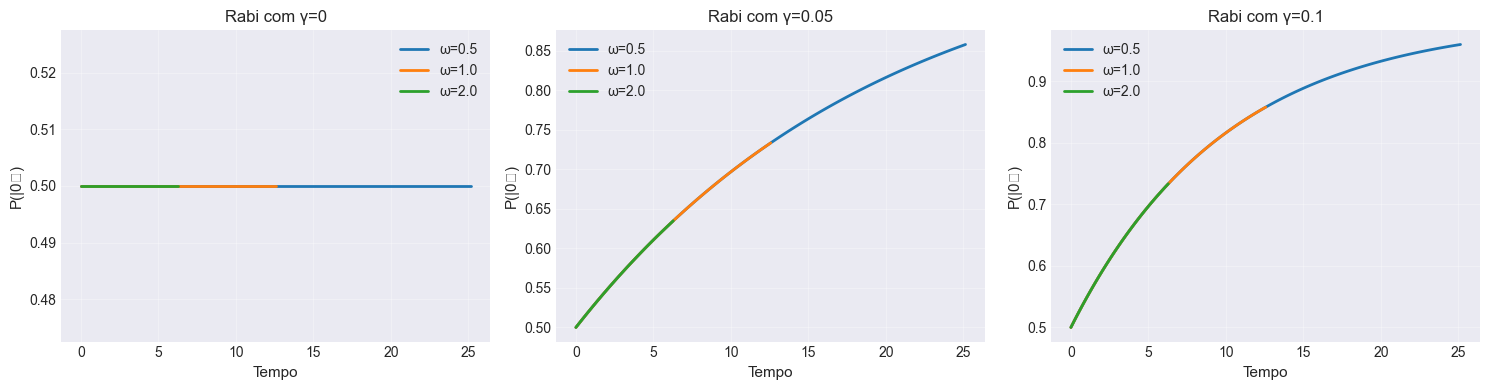

Análise completa de efeito de decaimento em oscilações de Rabi


In [37]:
# 7.1 Comparar diferentes frequências de Rabi
omegas = [0.5, 1.0, 2.0]
gammas = [0, 0.05, 0.1]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, gamma in enumerate(gammas):
    ax = axes[idx]
    for omega in omegas:
        times, p0, p1 = simular_rabi(omega, ket_plus, gamma=gamma)
        ax.plot(times, p0, label=f'ω={omega}', linewidth=2)
    
    ax.set_xlabel('Tempo', fontsize=11)
    ax.set_ylabel('P(|0⟩)', fontsize=11)
    ax.set_title(f'Rabi com γ={gamma}', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("Análise completa de efeito de decaimento em oscilações de Rabi")

## Seção 7: Experimentos Paramétricos

Vamos variar parâmetros e comparar resultados.

In [38]:
# 6.1 Função para simular oscilações de Rabi
def simular_rabi(omega, psi0, T_final=None, gamma=0):
    """
    Simula oscilações de Rabi com decaimento opcional.
    
    Parâmetros:
    - omega: frequência de Rabi
    - psi0: estado inicial
    - T_final: tempo final (padrão: 4π/ω)
    - gamma: taxa de decaimento (default: 0)
    
    Retorna: (times, populations)
    """
    if T_final is None:
        T_final = 4 * np.pi / omega
    
    H = (omega / 2) * Z
    times = np.linspace(0, T_final, 100)
    
    c_ops = [np.sqrt(gamma) * qt.destroy(2)] if gamma > 0 else []
    result = qt.mesolve(H, psi0, times, c_ops, [])
    
    p0 = [qt.expect(ket0 * ket0.dag(), state) for state in result.states]
    p1 = [qt.expect(ket1 * ket1.dag(), state) for state in result.states]
    
    return times, np.array(p0), np.array(p1)

# Testar função
print("✓ Função simular_rabi criada")

✓ Função simular_rabi criada


## Seção 6: Função Auxiliar - Análise de Experimentos

Vamos criar funções reutilizáveis para analisar diferentes configurações.

C:\Users\karin\AppData\Local\Temp\ipykernel_2080\2085841633.py:33: UserWarning: Glyph 10217 (\N{MATHEMATICAL RIGHT ANGLE BRACKET}) missing from font(s) Arial.
  plt.tight_layout()


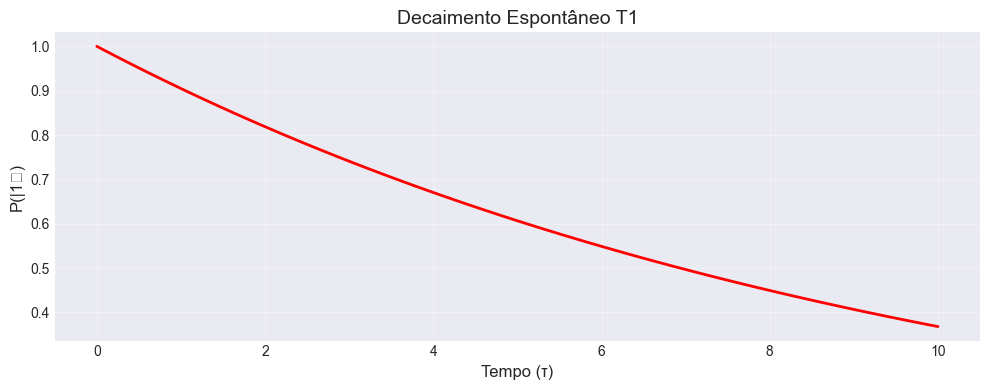

Tempo T1 = 10.0τ


In [39]:
# 5.1 Decaimento espontâneo (T1)
# Operador de abaixamento σ⁻ = |0⟩⟨1|
sigma_m = qt.destroy(2)  # operador de abaixamento

# Taxa de decaimento
gamma = 0.1  # decaimento

# Hamiltoniana nula (só dinâmica de decaimento)
H_decay = qt.qzero(2)  # operador zero

# Operadores de Lindblad (collapse operators)
c_ops = [np.sqrt(gamma) * sigma_m]

# Estado inicial: |1⟩
psi0_decay = ket1

# Resolver
times_decay = np.linspace(0, 10, 100)
result_decay = qt.mesolve(H_decay, psi0_decay, times_decay, c_ops, [])

# Calcular probabilidade de estar em |1⟩
p1_decay = []
for state in result_decay.states:
    p1_val = qt.expect(ket1 * ket1.dag(), state)
    p1_decay.append(p1_val.real if hasattr(p1_val, 'real') else p1_val)

plt.figure(figsize=(10, 4))
plt.plot(times_decay, p1_decay, linewidth=2, color='red')
plt.xlabel('Tempo (τ)', fontsize=12)
plt.ylabel('P(|1⟩)', fontsize=12)
plt.title('Decaimento Espontâneo T1', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Tempo característico de decaimento
T1 = 1 / gamma
print(f"Tempo T1 = {T1:.1f}τ")

## Seção 5: Sistema Aberto - Decaimento

Sistemas quânticos reais sofrem **dissipação**. Usamos a **Master Equation** de Lindblad.

In [ ]:
# 4.1 Visualizar trajetória na Bloch sphere
sphere = qt.Bloch()

# Adicionar estados importantes
sphere.add_states([ket0, ket1, ket_plus])
sphere.point_color = ['red', 'blue', 'green']
sphere.point_marker = ['o', 'o', 'o']

# Trajetória da evolução (amostras)
for state in result.states[::10]:
    sphere.add_states(state)

# Renderizar primeiro, depois salvar a figura
sphere.render()
if sphere.fig is not None:
    sphere.fig.savefig(output_dir / 'bloch_sphere.png', dpi=150, bbox_inches='tight')
plt.show()

print("Bloch sphere com trajetória de evolução!")

Bloch sphere com trajetória de evolução!


## Seção 4: Visualização - Bloch Sphere

A **Bloch sphere** é uma forma visual de representar estados de um qubit.

C:\Users\karin\AppData\Local\Temp\ipykernel_2080\1165797869.py:33: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\karin\AppData\Local\Temp\ipykernel_2080\1165797869.py:33: UserWarning: Glyph 10217 (\N{MATHEMATICAL RIGHT ANGLE BRACKET}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\karin\AppData\Roaming\Python\Python314\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


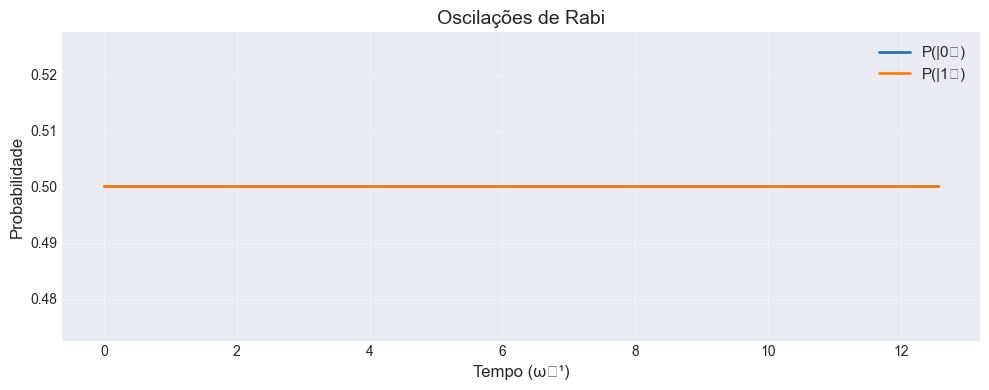

✓ Oscilação de Rabi observada!


In [41]:
# 3.1 Exemplo: Precession de um qubit em campo magnético
# Hamiltoniana: H = (ω/2) Z
omega = 1.0  # frequência de Rabi
H = (omega / 2) * Z

# Estado inicial: |+⟩
psi0 = ket_plus

# Tempo de evolução
times = np.linspace(0, 4*np.pi/omega, 100)

# Resolver Schrödinger
result = qt.mesolve(H, psi0, times, [])

# Visualizar população em |0⟩ e |1⟩
p0 = []
p1 = []
for state in result.states:
    # Usar o método expect para calcular probabilidade
    p0_val = qt.expect(ket0 * ket0.dag(), state)
    p1_val = qt.expect(ket1 * ket1.dag(), state)
    p0.append(p0_val.real if hasattr(p0_val, 'real') else p0_val)
    p1.append(p1_val.real if hasattr(p1_val, 'real') else p1_val)

plt.figure(figsize=(10, 4))
plt.plot(times, p0, label='P(|0⟩)', linewidth=2)
plt.plot(times, p1, label='P(|1⟩)', linewidth=2)
plt.xlabel('Tempo (ω⁻¹)', fontsize=12)
plt.ylabel('Probabilidade', fontsize=12)
plt.title('Oscilações de Rabi', fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"✓ Oscilação de Rabi observada!")

## Seção 3: Dinâmica - Evolução Temporal

A evolução de um sistema quântico é governada pela **Equação de Schrödinger**:

$$i\hbar \frac{d|\psi\rangle}{dt} = H|\psi\rangle$$

In [42]:
# 2.2 Autovalores e autovetores
# Para o operador Z
eigenvalues, eigenstates = Z.eigenstates()
print("Autovalores de Z:", eigenvalues)
print("\nAutoestados de Z:")
for i, state in enumerate(eigenstates):
    print(f"λ={eigenvalues[i]}: {state.full().T}")

Autovalores de Z: [-1.  1.]

Autoestados de Z:
λ=-1.0: [[ 0.+0.j -1.+0.j]]
λ=1.0: [[-1.+0.j -0.+0.j]]


In [43]:
# 2.1 Matrizes de Pauli
X = qt.sigmax()
Y = qt.sigmay()
Z = qt.sigmaz()
I = qt.qeye(2)

print("Operador X (Pauli-X):")
print(X)
print("\nOperador Z (Pauli-Z):")
print(Z)
print()

# Verificar propriedades
print(f"X² = I? {(X*X - I).norm() < 1e-10}")
print(f"Tr(X) = {X.tr()}")
print(f"[X,Z] anti-comutam? {(X*Z + Z*X).norm() < 1e-10}")

Operador X (Pauli-X):
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 1.]
 [1. 0.]]

Operador Z (Pauli-Z):
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

X² = I? True
Tr(X) = 0.0
[X,Z] anti-comutam? True


## Seção 2: Operadores Quânticos

Operadores importantes em sistemas quânticos:
- **Pauli X, Y, Z**: rotações no Bloch sphere
- **Identidade**: operador unitário
- **Números**: operador de ocupação

In [44]:
# 1.2 Matriz densidade (estado misto)
# Estado puro |0⟩ como matriz densidade
rho_0 = ket0 * ket0.dag()
print("Matriz densidade ρ = |0⟩⟨0|:")
print(rho_0)
print()

# Estado misto: mistura 50/50 de |0⟩ e |1⟩
rho_mixed = 0.5 * (ket0 * ket0.dag()) + 0.5 * (ket1 * ket1.dag())
print("Estado misto: 50% |0⟩ e 50% |1⟩:")
print(rho_mixed)
print()

# Verificar pureza usando Tr(ρ²)
purity_0 = (rho_0 * rho_0).tr().real
purity_mixed = (rho_mixed * rho_mixed).tr().real
print(f"Pureza de |0⟩: {purity_0:.4f}")
print(f"Pureza do estado misto: {purity_mixed:.4f}")

Matriz densidade ρ = |0⟩⟨0|:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1. 0.]
 [0. 0.]]

Estado misto: 50% |0⟩ e 50% |1⟩:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.5 0. ]
 [0.  0.5]]

Pureza de |0⟩: 1.0000
Pureza do estado misto: 0.5000


In [45]:
# 1.1 Criar estados básicos de um qubit
# |0⟩ - estado zero
ket0 = qt.basis(2, 0)
print("Estado |0⟩:")
print(ket0)
print()

# |1⟩ - estado um
ket1 = qt.basis(2, 1)
print("Estado |1⟩:")
print(ket1)
print()

# Superposição: (|0⟩ + |1⟩)/√2 - estado +
ket_plus = (ket0 + ket1).unit()
print("Estado |+⟩ = (|0⟩ + |1⟩)/√2:")
print(ket_plus)

Estado |0⟩:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]

Estado |1⟩:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]]

Estado |+⟩ = (|0⟩ + |1⟩)/√2:
Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.70710678]
 [0.70710678]]


## Seção 1: Conceitos Básicos - Estados Quânticos

Um **estado quântico** pode ser:
- **Puro**: representado como ket $|\psi\rangle$
- **Misto**: representado como densidade $\rho$

In [46]:
# Setup: Importar bibliotecas
from pathlib import Path
import numpy as np
import pandas as pd
import qutip as qt
import matplotlib.pyplot as plt

# Configurar matplotlib para melhor visualização
plt.style.use('seaborn-v0_8-darkgrid')
print(f"✓ QuTiP versão: {qt.__version__}")

# Criar pasta de saída para resultados (evita bagunçar OneDrive + paths)
output_dir = Path.home() / "OneDrive" / "qutip_outputs"
output_dir.mkdir(parents=True, exist_ok=True)
print(f"✓ Pasta de saída: {output_dir}")

✓ QuTiP versão: 5.3.0.dev0+1329d01
✓ Pasta de saída: C:\Users\karin\OneDrive\qutip_outputs


# 🚀 Guia Prático: QuTiP para Iniciantes

Bem-vindo! Este notebook é seu guia prático para aprender **QuTiP** (Quantum Toolbox in Python).

Vamos explorar:
1. **Estados Quânticos** - Como representar sistemas quânticos
2. **Operadores** - Matriz densidade, operadores de Pauli
3. **Dinâmica** - Evolução temporal de sistemas
4. **Visualização** - Bloch sphere e gráficos
5. **Exemplos Práticos** - Decaimento, precession, entanglement